# 3. Simple Linear Regression

In [106]:
import janitor as jn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [107]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

## 3.1 Simple Linear Regression

In [108]:
# advertising = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv')
advertising = pd.read_csv("./data/Advertising.csv", index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [109]:
x = advertising["TV"]
y = advertising["sales"]

In [110]:
reg = stats.linregress(x, y)
y_pred = reg.slope * x + reg.intercept

In [111]:
print(reg.intercept)
print(reg.slope)

7.032593549127695
0.04753664043301975


In [112]:
np.fmin(y, y_pred)

1      17.970775
2       9.147974
3       7.850224
4      14.234395
5      12.900000
         ...    
196     7.600000
197     9.700000
198    12.800000
199    20.513985
200    13.400000
Length: 200, dtype: float64

### FIGURE 3.1.

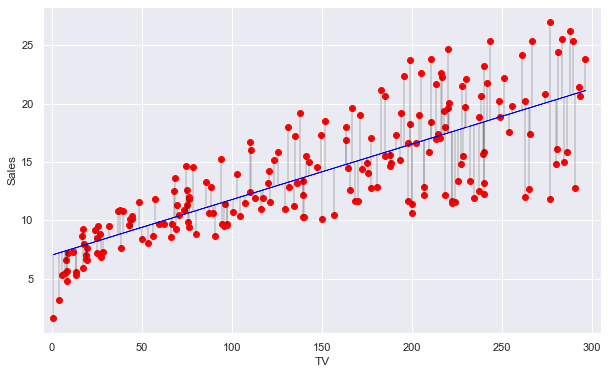

In [113]:
_, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x, y, color="red")
ax.plot(x, y_pred, color="blue", lw=0.8)

ax.vlines(x, ymin=np.fmin(y, y_pred), ymax=np.fmax(y, y_pred), color="k", lw=0.3)

ax.set(xlabel="TV", ylabel="Sales", xlim=(-5, 305))

plt.show()

### FIGURE 3.2.

## 3.2 Multiple Linear Regression

### FIGURE 3.4.

### FIGURE 3.5.

## 3.3 Other Considerations in the Regression Model

### FIGURE 3.6.

### FIGURE 3.7.

### FIGURE 3.8.

### FIGURE 3.9.

### FIGURE 3.10.

### FIGURE 3.11.

### FIGURE 3.12.

### FIGURE 3.13.

### FIGURE 3.14.

### FIGURE 3.15.

## 3.5 Comparison of Linear Regression with K-Nearest Neighbors

## 3.6 Lab: Linear Regression of Housing Values in Suburbs of Boston

**The MEDV variable is the target variable.**

**Data description**

  The Boston data frame has 506 rows and 14 columns.This data frame contains the following columns:
  
  crim
  per capita crime rate by town.
  
  zn
  proportion of residential land zoned for lots over 25,000 sq.ft.
  
  indus
  proportion of non-retail business acres per town.
  
  chas
  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
  
  nox
  nitrogen oxides concentration (parts per 10 million).
  
  rm
  average number of rooms per dwelling.
  
  age
  proportion of owner-occupied units built prior to 1940.
  
  dis
  weighted mean of distances to five Boston employment centres.
  
  rad
  index of accessibility to radial highways.
  
  tax
  full-value property-tax rate per \$10,000.
  
  ptratio
  pupil-teacher ratio by town.
  
  black
  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
  
  lstat
  lower status of the population (percent).
  
  **medv
  median value of owner-occupied homes in \$1000s.**

In [114]:
# raw_df = pd.read_csv('./data/boston',
#                      sep="\s+",
#                      skiprows=22,
#                      header=None)
# col_names = pd.read_table('./data/boston',skiprows=7, header=None)
# col_names = col_names[:14]

In [115]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

In [116]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [117]:
boston_clean = boston.dropna()
boston_clean.shape

(506, 13)

In [118]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [119]:
boston["MEDV"] = boston_dataset.target

In [120]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [121]:
boston.isnull().sum()  # check that there are no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [122]:
sns.set(rc={"figure.figsize": (8, 8)})

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


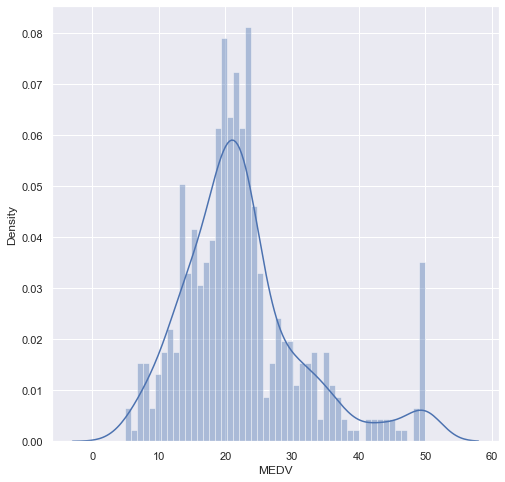

In [123]:
sns.distplot(boston["MEDV"], bins=50)
plt.show()

<AxesSubplot:>

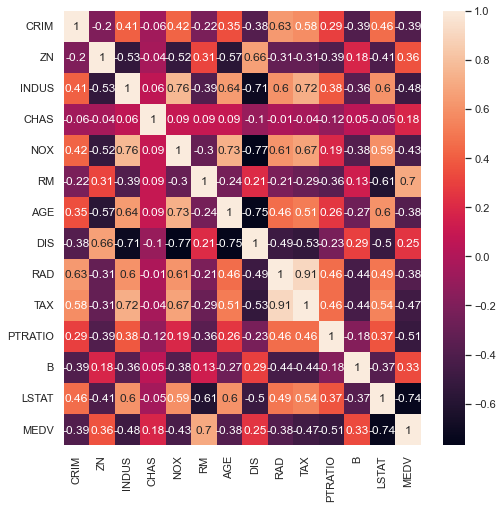

In [124]:
# correlation matrix
corr_matrix = boston.corr().round(2)
sns.heatmap(corr_matrix, annot=True)

In [125]:
corr_matrix.loc[(corr_matrix["MEDV"] < -0.5) | (corr_matrix["MEDV"] > 0.5), "MEDV"]

RM         0.70
PTRATIO   -0.51
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

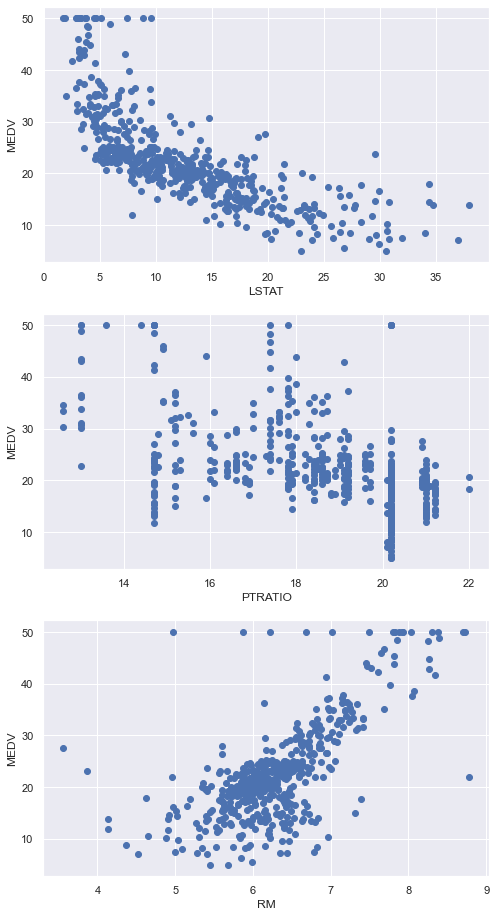

In [126]:
features = ["LSTAT", "PTRATIO", "RM"]

_, axes = plt.subplots(len(features), 1, figsize=(8, 16))

for i, col in enumerate(features):
    X = boston[col]
    y = boston["MEDV"]
    axes[i].scatter(X, y)
    axes[i].set(xlabel=col, ylabel="MEDV")

plt.show()

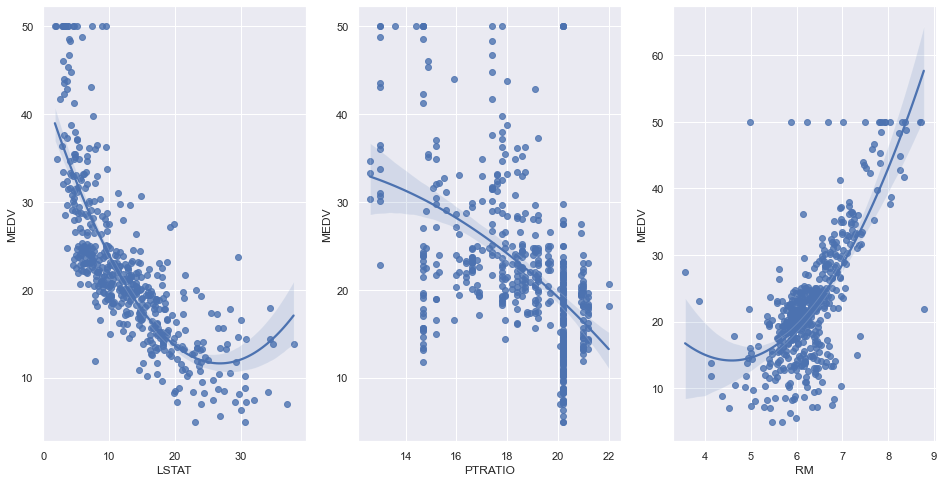

In [127]:
_, axes = plt.subplots(1, 3, figsize=(16, 8))


g1 = sns.regplot(x="LSTAT", y="MEDV", data=boston, order=2, ax=axes[0])

g2 = sns.regplot(x="PTRATIO", y="MEDV", data=boston, order=2, ax=axes[1])

g3 = sns.regplot(x="RM", y="MEDV", data=boston, order=2, ax=axes[2])

Let's start by using the `statsmodels` module to fit a simple linear regression model, with `medv` as the response and `lstat` as the predictor. The basic syntax is `smf.ols('y~x', data)`, where `y` is the response, `x` the predictor, and `data` is the data frame in which these two variables are kept.

In [128]:
lm_fit = smf.ols("MEDV~LSTAT", boston).fit()

To print some information about the model, we use the `summary()` method. This gives us p-values and standard errors for the coefficients, as well as the $R^2$ statistic and F-statistic for the model.

In [129]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           5.08e-88
Time:                        13:46:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can access many of this values directly, for example, to get a list of the parameters:

In [130]:
lm_fit.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In order to obtain a 95% confidence interval for the coefficient estimates, we can use the `conf_int()` method.

In [131]:
lm_fit.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


The fitted values of the model are stored in `lm_fit.fittedvalues`

The `statsmodels` module can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat` (predictions).

In [135]:
predictors = pd.DataFrame({"LSTAT": [5, 10, 15]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


In [137]:
predictors

,LSTAT
0,5
1,10
2,15


In [133]:
boston["LSTAT"]

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [152]:
predictions = lm_fit.get_prediction(boston).summary_frame(alpha=0.05)

In [237]:
mean_obs = predictions.columns[2:].tolist()

In [238]:
mean_obs[:2]

['mean_ci_lower', 'mean_ci_upper']

In [239]:
mean_obs[2:4]

['obs_ci_lower', 'obs_ci_upper']

In [240]:
len(mean_obs)

4

In [241]:
predictions[mean_obs]

,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.025299,30.619891,17.584603,42.060587
1,25.265246,26.475534,13.643413,38.097367
2,29.873477,31.576807,18.483488,42.966796
3,30.843594,32.677798,19.514315,44.007076
4,28.712077,30.268079,17.253328,41.726828
...,...,...,...,...
501,24.778424,25.955303,13.140702,37.593025
502,25.320218,26.534568,13.700315,38.154470
503,28.434281,29.956844,16.959864,41.431261
504,27.679603,29.115439,16.164444,40.630598


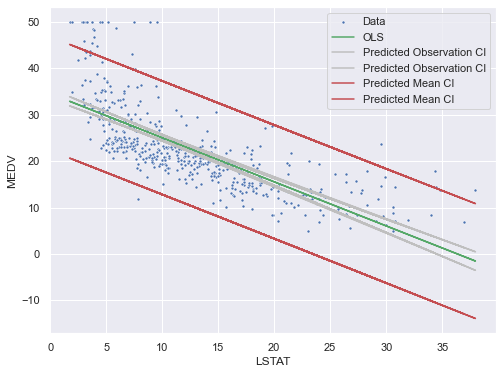

In [242]:
_, ax = plt.subplots(figsize=(8, 6))

g1 = sns.scatterplot(x="LSTAT", y="MEDV",marker=".", data=boston, label="Data")

ax.plot(boston["LSTAT"], lm_fit.fittedvalues, "g", label="OLS")

for prd in mean_obs[:2]:
    ax.plot(
        boston["LSTAT"],
        predictions[prd],
        color="0.75",
        label="Predicted Observation CI",
    )

for prd in mean_obs[2:4]:
    ax.plot(boston["LSTAT"], predictions[prd], color="r", label="Predicted Mean CI")

ax.set(xlabel="LSTAT", ylabel="MEDV")
ax.legend()


plt.show()

For instance, the 95 % confidence interval associated with a lstat value of 10 is (24.47, 25.63), and the 95 % prediction interval is (12.828, 37.28). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for medv when lstat equals 10), but the latter are substantially wider.

We will now plot medv and lstat along with the least squares regression line using the plot() function.

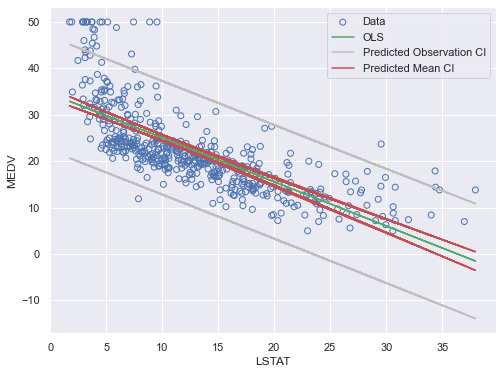

In [243]:
_, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    boston["LSTAT"], boston["MEDV"], facecolors="none", edgecolors="b", label="Data"
)
ax.plot(boston["LSTAT"], lm_fit.fittedvalues, "g", label="OLS")


ax.plot(
    boston["LSTAT"],
    predictions.obs_ci_lower,
    color="0.75",
    label="Predicted Observation CI",
)
ax.plot(boston["LSTAT"], predictions.obs_ci_upper, color="0.75", label="")

ax.plot(
    boston["LSTAT"], predictions.mean_ci_lower, color="r", label="Predicted Mean CI"
)
ax.plot(boston["LSTAT"], predictions.mean_ci_upper, color="r", label="")


ax.set(xlabel="LSTAT", ylabel="MEDV")
ax.legend(loc="best")


plt.show()

Next we examine some diagnostic plots, several of which were discussed in Section 3.3.3. Three important diagnostic plots are implemented below:

In [29]:
from statsmodels.stats.outliers_influence import OLSInfluence

resid_t = OLSInfluence(lm_fit).resid_studentized_external

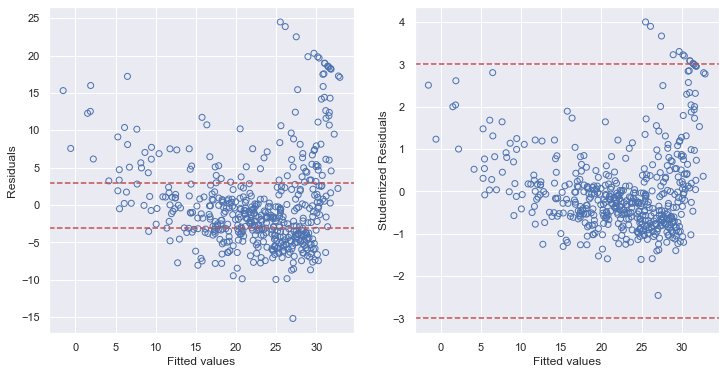

In [30]:
_, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors="none", edgecolors="b")
axes[0].set(ylabel="Residuals")

axes[1].scatter(lm_fit.fittedvalues, resid_t, facecolors="none", edgecolors="b")
axes[1].set(ylabel="Studentized Residuals")

for i in range(2):
    axes[i].set(xlabel="Fitted values")
    axes[i].axhline(y=3, color="r", linestyle="dashed")
    axes[i].axhline(y=-3, color="r", linestyle="dashed")
# |studentized residual| > 3 are generally considered outliers

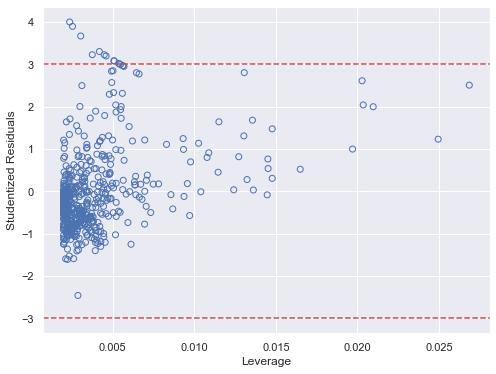

In [218]:
leverage = OLSInfluence(lm_fit).hat_matrix_diag

_, ax = plt.subplots(figsize=(8, 6))

ax.scatter(leverage, resid_t, facecolors="none", edgecolors="b")

ax.axhline(y=3, color="r", linestyle="dashed")
ax.axhline(y=-3, color="r", linestyle="dashed")

ax.set(xlabel="Leverage", ylabel="Studentized Residuals")
plt.show()

To asses the normality of the residuals we can use a Normal Probability plot.

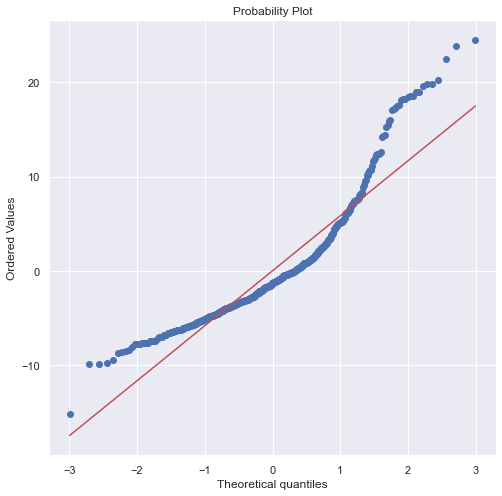

In [220]:
from scipy.stats import probplot

_ = probplot(lm_fit.resid, plot=plt)

## Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the statsmodels module. The syntax `smf.ols('y~x1+x2+x3, data)` is used to fit a model with three predictors, `x1`, `x2`, and `x3`. The `summary()` function now outputs the regression coefficients for all the predictors.

In [33]:
lm_fit = smf.ols("MEDV~LSTAT+AGE", boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           2.98e-88
Time:                        13:37:57   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `Boston` data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [34]:
preds = boston.columns.tolist()
preds.remove("MEDV")
my_formula = "MEDV~" + "+".join(preds)
my_formula

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [35]:
lm_ins = smf.ols(my_formula, boston)
lm_fit = lm_ins.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          6.72e-135
Time:                        13:37:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can access the individual components of a summary object by name.

In [36]:
lm_fit.rsquared

0.7406426641094094

In [37]:
rse = np.sqrt(lm_fit.mse_resid)
rse

4.745298181699631

statsmodels can also be used to compute variance inflation factors. Most VIF’s are low to moderate for this data.

One recommendation is that if VIF is greater than 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [230]:
vifs = [
    (predictor, variance_inflation_factor(lm_ins.exog, idx))
    for (idx, predictor) in enumerate(lm_ins.exog_names)
]

print("Variance Inflation Factors")
for tup in vifs:
    print(f"{tup[0]}   {tup[1].round(3)}")

Variance Inflation Factors
Intercept   585.265
CRIM   1.792
ZN   2.299
INDUS   3.992
CHAS   1.074
NOX   4.394
RM   1.934
AGE   3.101
DIS   3.956
RAD   7.484
TAX   9.009
PTRATIO   1.799
B   1.349
LSTAT   2.941


What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except age.

In [232]:
preds = boston.columns.tolist()
preds.remove("MEDV")
preds.remove("AGE")
my_formula = "MEDV~" + "+".join(preds)
my_formula

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [41]:
lm_fit1 = smf.ols(my_formula, boston).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          6.08e-136
Time:                        13:37:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interaction Terms

It is easy to include interaction terms in a linear model. The syntax lstat:black tells statsmodels to include an interaction term between lstat and black. The syntax lstat*age simultaneously includes lstat, age,
and the interaction term lstat×age as predictors; it is a shorthand for lstat+age+lstat:age.

In [42]:
smf.ols(formula="MEDV ~ LSTAT*AGE", data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           4.86e-88
Time:                        13:37:57   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linear Transformations of the Predictors

statsmodel can also accommodate non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ using `I(X**2)`.

In [43]:
from statsmodels.stats.api import anova_lm

In [44]:
lm_fit2 = smf.ols("MEDV ~ LSTAT + I(LSTAT**2)", boston).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          1.56e-112
Time:                        13:37:57   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the anova_lm() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [45]:
lm_fit = smf.ols("MEDV ~ LSTAT", boston).fit()
lm_fit2 = smf.ols("MEDV ~ LSTAT + I(LSTAT**2)", boston).fit()

anova_lm(lm_fit, lm_fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor, lstat, while Model 2 corresponds to the larger quadratic model that has two 2 predictors, lstat and lstat^2. The anova_lm() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors lstat and lstat2 is far superior to the model that only
contains the predictor lstat . This is not surprising, since earlier we saw evidence for non-linearity in the relationship between medv and lstat. If we plot the residuals for Model 2, there is little discernible pattern in the residuals.

[Text(0.5, 0, 'LSTAT'), Text(0, 0.5, 'MEDV')]

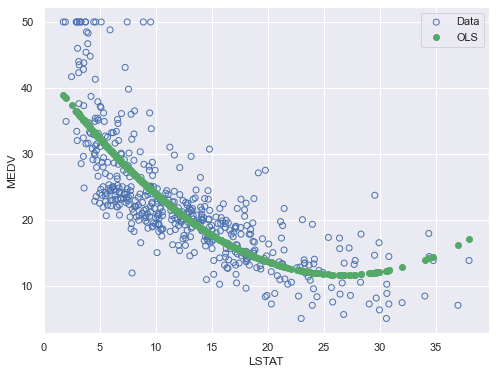

In [244]:
_, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    boston["LSTAT"], boston.MEDV, facecolors="none", edgecolors="b", label="Data"
)
ax.plot(
    boston["LSTAT"],
    lm_fit2.fittedvalues,
    "g",
    marker="o",
    linestyle="none",
    label="OLS",
)

ax.legend(loc="best")
ax.set(xlabel="LSTAT", ylabel="MEDV")

[Text(0.5, 1.0, 'Quadratic Model Residuals'), Text(0.5, 0, 'Fitted values')]

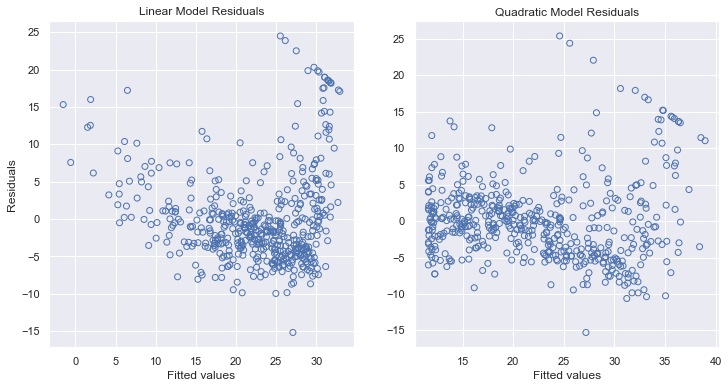

In [47]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors="none", edgecolors="b")
ax1.set(xlabel="Fitted values", ylabel="Residuals", title="Linear Model Residuals")

ax2.scatter(lm_fit2.fittedvalues, lm_fit2.resid, facecolors="none", edgecolors="b")
ax2.set(title="Quadratic Model Residuals", xlabel="Fitted values")

In order to create a cubic fit, we can include a predictor of the form I(X**3). However, this approach can start to get cumbersome for higher-order polynomials. A better approach is the following:

In [48]:
formula = "MEDV ~ LSTAT +" + " + ".join("I(LSTAT**{})".format(i) for i in range(2, 6))
formula

'MEDV ~ LSTAT +I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5)'

In [49]:
lm_fit5 = smf.ols(formula, boston).fit()
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          8.73e-122
Time:                        13:37:57   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
LSTAT           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(LSTAT ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(LSTAT ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(LSTAT ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(LSTAT ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant p-values in a regression fit.

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [50]:
smf.ols("MEDV ~ np.log(LSTAT)", boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          9.28e-122
Time:                        13:37:57   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Qualitative Predictors

We will now examine the Carseats data. We will attempt to predict Sales (child car seat sales) in 400 locations
based on a number of predictors.

In [51]:
carseats = pd.read_csv("data/Carseats.csv", index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The Carseats data includes qualitative predictors such as `ShelveLoc`, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor `ShelveLoc` takes on three possible values, Bad, Medium, and Good.

Given a qualitative variable such as `Shelveloc`, `statsmodels` generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [52]:
preds = carseats.columns.tolist()[1:]
formula = "Sales ~ " + " + ".join(preds) + " + Income:Advertising + Price:Age"
formula

'Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income:Advertising + Price:Age'

In [53]:
lm_fit = smf.ols(formula, carseats).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          6.14e-166
Time:                        13:37:57   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R has created a ShelveLoc[T.Good] dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ShelveLoc[T.Medium] dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficient for ShelveLoc[T.Good] in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And ShelveLoc[T.Medium] has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location but lower sales than a good shelving location.

# Conceptual

## 1. 

Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

The null hypotheses are:

1) There is no relationship between amount spent on TV advertising and Sales
2) There is no relationship between amount spent on radio ads and Sales
3) There is no relationship between amount spent on newspaper ads and Sales

The p-values given in table 3.4 suggest that we can reject the null hypotheses 1 & 2, it seems likely that there is a relationship between TV ads and Sales, and radio ads and sales.

The p-value associated with the t-statistic for newspaper ads is high which suggests that we cannot reject null hypothesis 3. This suggests that there is no significant relationship between newspaper ads and sales.

## 2. 

Carefully explain the differences between the KNN classifier and KNN regression methods.

The KNN classifier determines a decision boundary which can be used to segment data into 2 or more clusters or groups. 

KNN regression is non-parmetric method for estimating a regression function that can be used to predict some quantitivie variable.

## 3. 

Suppose we have a data set with five predictors, $X_1$ = GPA, $X_2$ = IQ, $X_3$ = Gender (1 for Female and 0 for Male), $X_4$ = Interaction between GPA and IQ, and $X_5$ = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $β_0 = 50, β_1 = 20 , β_2 = 0.07 , β_3 = 35 , β_4 = 0.01 , β_5 = −10$ 

(a) Which answer is correct, and why?

- i. For a fixed value of IQ and GPA, males earn more on average than females.
- ii. For a fixed value of IQ and GPA, females earn more on average than males.
- iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.
- iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

Because X3 is our dummy variable for gender with 1 for female and 0 male, and coefficient 35, which means – all else being equal – the model will estimate a starting salary for females `$`35k higher than for males, but there is an additional interaction variable concerning GPA and gender which means if GPA > 3.5 then males earn more than females.

(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0

In [54]:
def f(gpa, iq, gender):
    return (
        50 + 20 * gpa + 0.07 * iq + 35 * gender + 0.01 * gpa * iq + (-10 * gpa * gender)
    )


gpa = 4
iq = 110
gender = 1

print("$" + str(f(gpa, iq, gender) * 1000))

$137100.0


(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

False: the interaction effect might be small but we would need to inspect the standard error to understand if this interaction effect is significant. If the standard error is also very small then it might still be considered a significant effect.

## 4. 

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e.
$$Y = \beta_0 +\beta_1X + \beta_2X^2 +\beta_3X^3 + \epsilon$$

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

We would expect the training RSS for the cubic model because it is more flexible which allows it to fit more closely variance in the training data – which will reduce RSS despite this note being representative of a closer approaximation to the true linear relationship that is f(x).

(b) Answer (a) using test rather than training RSS.

We would expect the test RSS for the linear regression to be lower because the assumption of high bias is correct and so the lack of flexibility in that model is of no cost in estimating the true f(x). The cubic model is more flexible, and so is likely to overfit the training data meaning that the fit of the model will be affected by variance in the training data that is not representive of the true f(x).

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

We expect training RSS to decrease as the the variance/flexibility of our model increases. This holds true regardles of the true value of f(x). So we expect the cubic model to result in a lower training RSS

(d) Answer (c) using test rather than training RSS.

There is not enough information to answer this fully.

If the true relationship is highly non-linear and there is low noise (or irreducible error) in our training data then we might expect the more flexible cubic model to deliver a better test RSS.

However, if the relationship is only slightly non-linear or the noise in our training data is high then a linear model might deliver better results.

## 5. 

Consider the fitted values that result from performing linear regression without an intercept. In this setting, the i-th fitted value takes the form:

# Applied

## 8. Auto dataset for simlple linear regression

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor

In [57]:
auto = pd.read_csv("./data/Auto.csv")

auto = auto.drop(auto[auto.values == "?"].index)
auto = auto.reset_index()
auto.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [58]:
datatypes = {
    "quant": [
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
    ],
    "qual": ["origin", "name"],
}

In [59]:
quants = auto[datatypes["quant"]].astype(np.float_)
auto = pd.concat([quants, auto[datatypes["qual"]]], axis=1)

In [60]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino


### (a) lm() function

Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

- i. Is there a relationship between the predictor and the response?

    Yes, the low P-value associated with the t-statistic for horsepower suggests so.

In [61]:
ax.scatter(auto["horsepower"], auto["mpg"])

In [62]:
X = auto["horsepower"]
X = sm.add_constant(X)
X.head()

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0


In [63]:
y = auto["mpg"]
lm_auto = sm.OLS(y, X)
results = lm_auto.fit()

In [64]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        13:37:57   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [65]:
ax.scatter(x=results.fittedvalues, y=results.resid)

- ii. How strong is the relationship between the predictor and the response?

    For a unit increase in horsepower, our model predicts mpg will decrease by -0.1578

- iii. Is the relationship between the predictor and the response positive or negative?

    Negative

- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [66]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [67]:
x = np.array([1, 98])
print("{} mpg".format(results.params.dot(x)))

24.46707715251242 mpg


In [68]:
results.get_prediction([1, 98]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [69]:
results.conf_int()

,0,1
const,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [70]:
print(
    "with 95% confidence interval [{}, {}]".format(
        results.conf_int().T.dot(x)[0], results.conf_int().T.dot(x)[1]
    )
)

with 95% confidence interval [21.81454495972264, 27.119609345302198]


In [71]:
vifs = [
    (predictor, variance_inflation_factor(lm_ins.exog, idx))
    for (idx, predictor) in enumerate(lm_ins.exog_names)
]

print("Variance Inflation Factors")
for tup in vifs:
    print("{:10}".format(tup[0]), "{:.3f}".format(tup[1]))

Variance Inflation Factors
Intercept  585.265
CRIM       1.792
ZN         2.299
INDUS      3.992
CHAS       1.074
NOX        4.394
RM         1.934
AGE        3.101
DIS        3.956
RAD        7.484
TAX        9.009
PTRATIO    1.799
B          1.349
LSTAT      2.941


### (b) abline() function

Plot the response and the predictor. Use the abline() function to display the least squares regression line.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

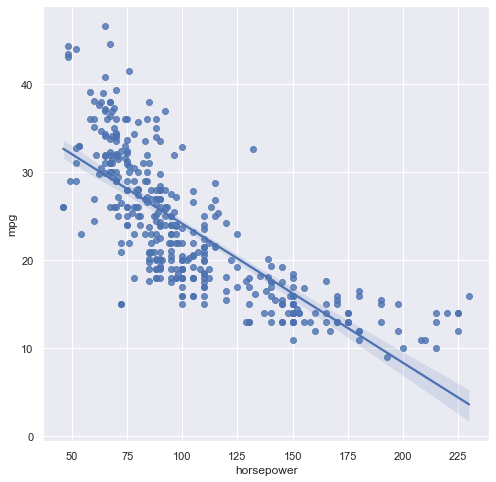

In [72]:
sns.regplot(x=auto["horsepower"], y=auto["mpg"], fit_reg=True)

### (c) plot() function

Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit

In [274]:
# https://en.wikipedia.org/wiki/Studentized_residual#How_to_studentize


def lm_plots(
    lm,
):
    resid_t = OLSInfluence(lm).resid_studentized_external
    resid_t_sqrt = np.sqrt(np.abs(resid_t))
    leverage = OLSInfluence(lm).hat_matrix_diag
    cooks_distance = OLSInfluence(lm).cooks_distance[0]

    y_pred = lm.fittedvalues
    p = len(lm.params)

    plt.subplots(1, figsize=(16, 18))

    # Studentised residual plot
    ax1 = plt.subplot(321)
    ax1.scatter(y_pred, resid_t_sqrt, alpha=0.5, color="#3D89BE")
    sns.regplot(
        y_pred,
        resid_t_sqrt,
        scatter=False,
        ci=False,
        lowess=True,
        line_kws={"color": "red", "lw": 1, "alpha": 0.8},
    )
    ax1.set(xlabel="Fitted values")
    ax1.set(ylabel="$\sqrt{Standardized\ residuals}}$")
    ax1.set(title="Scale-Location")
    # # annotations
    # abs_sq_norm_resid = np.flip(np.argsort(resid_t_sqrt), 0)
    # abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    # for i in abs_norm_resid_top_3:
    #     ax1.annotate(i, xy=(y_pred[i], resid_t_sqrt[i]))

    # Normal Q-Q plot
    ax2 = plt.subplot(322)
    ax2.scatter(y_pred, resid_t, alpha=0.5, color="#3D89BE")
    sns.regplot(
        y_pred,
        resid_t,
        scatter=False,
        ci=False,
        lowess=True,
        line_kws={"color": "red", "lw": 1, "alpha": 0.8},
    )
    ax2.set(xlabel="Fitted values")
    ax2.set(ylabel="Studentised residuals")
    ax2.set(title="Externally studentised residual plot")
    # |studentized residual| > 3 are generally considered outliers
    ax2.axhline(y=3, color="r", linestyle="dashed")
    ax2.axhline(y=-3, color="r", linestyle="dashed")
    # # annotations
    # abs_resid = abs(lm.resid).sort_values(ascending=False)
    # abs_resid_top_3 = abs_resid[:3]
    # for i in abs_resid_top_3.index:
    #     ax2.annotate(i, xy=(y_pred[i], resid_t[i]))

    # Standardised Residuals
    ax3 = plt.subplot(323)
    pp = ProbPlot(resid_t)
    pp.qqplot(
        ax=ax2,
        line="45",
        lw=1,
        alpha=0.5,
        color="#3D89BE",
    )
    ax3.set(ylabel="Studentised residuals")
    ax3.set(title="Normal Q-Q")
#     # annotations
#     abs_norm_resid = np.flip(np.argsort(np.abs(resid_t)), 0)
#     abs_norm_resid_top_3 = abs_norm_resid[:3]
    
#     for r, i in enumerate(abs_norm_resid_top_3):
#         ax3.annotate(i, xy=(np.flip(pp.theoretical_quantiles, 0)[r], resid_t[i]))

    # Residuals vs Leverage plot
    ax4 = plt.subplot(324)
    ax4.scatter(leverage, resid_t, alpha=0.5, color="#3D89BE")
    sns.regplot(
        leverage,
        resid_t,
        scatter=False,
        ci=False,
        lowess=True,
        line_kws={"color": "red", "lw": 1, "alpha": 0.8},
    )
    ax4.set(xlabel="Leverage")
    ax4.set(ylabel="Studentised residuals")
    ax4.set(title="Externally studentised residual vs Leverage")
    
    # # annotations
    # leverage_top_3 = np.flip(np.argsort(cooks_distance), 0)[:3]
    # for i in leverage_top_3:
    #     ax4.annotate(i, xy=(leverage[i], resid_t[i]))
        
        
    """
    # cook's distance contours
    cooksx = np.linspace(min(leverage), max(leverage)*1.01 , 50)
    ax4.plot(cooksx, np.sqrt((0.5 * p * (1 - cooksx)) / cooksx), ls=':', c='r', label='Cook\'s distance') # 0.5 line
    ax4.plot(cooksx, np.sqrt((1 * p * (1 - cooksx)) / cooksx), ls=':', c='r') # 1 line
    ax4.legend()
    """

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument wil

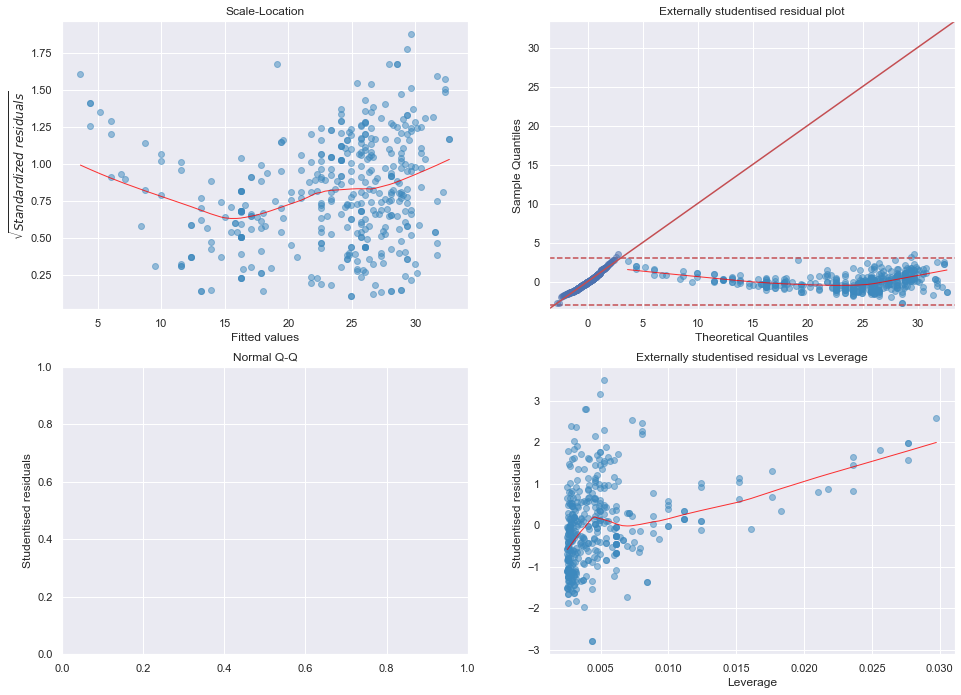

In [275]:
lm_plots(results)

**Non-linearity of the data**: The residual plot exhibits a discernable pattern, in this case **u-shaped**, that suggests our linear model is not providing a optimal fit to our data - the relationship is non-linear. A discernable pattern in this plot suggests that our model is failing to account for some of the reducible variance in the responses. 

**Normality**: The Q-Q plot shows that our studentised residuals have a slightly non-normal distribution.

**Heteroscedasticity** – The residual plot exhibits a conical shape. This suggests that there is some heteroscedasticity in our predictor. The standardized plot also exhibits this characteristic suggesting that standardisation doesn't alleviate the issue – to address this we might consider fitting our model by weighted least squares.

**Outliers and leverage**: The residual vs leverage plot suggests that there are several potential outliers  that could be having a strong effect (leverage) on our model. We should add more predictors to our model to clarify outliers.

**Correlation of error terms**: We see a slight increase in error above the 300th observation suggesting some correlation effect. This could mean that our estimated standard errors underestimate the true standard errors. Our confidence and prediction intervals may be narrower than they should be.

In [289]:
def lm_residual_corr_plot(lm, y):
    y_pred = lm.fittedvalues
    resid = np.array(auto["mpg"] - y_pred)

    plt.subplots(1, figsize=(16, 5))
    plt.rcParams.update({'font.size': 60})
    ax = sns.lineplot(x=list(range(resid.shape[0])), y=resid)
    ax.set(xlabel="Observation")
    ax.set(ylabel="Residual")
    ax.set(title="Correlation of error terms")

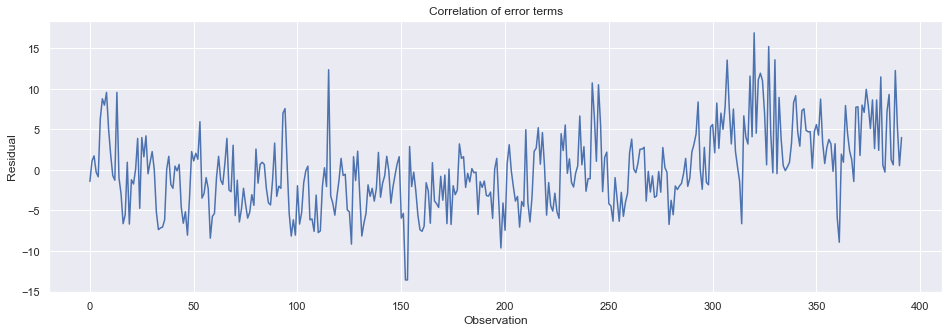

In [290]:
lm_residual_corr_plot(results, auto["mpg"])

## 9. Auto dataset for multivariate linear regression

### (a) Scatterplot matrix

Produce a scatterplot matrix which includes all of the variables in the data set.

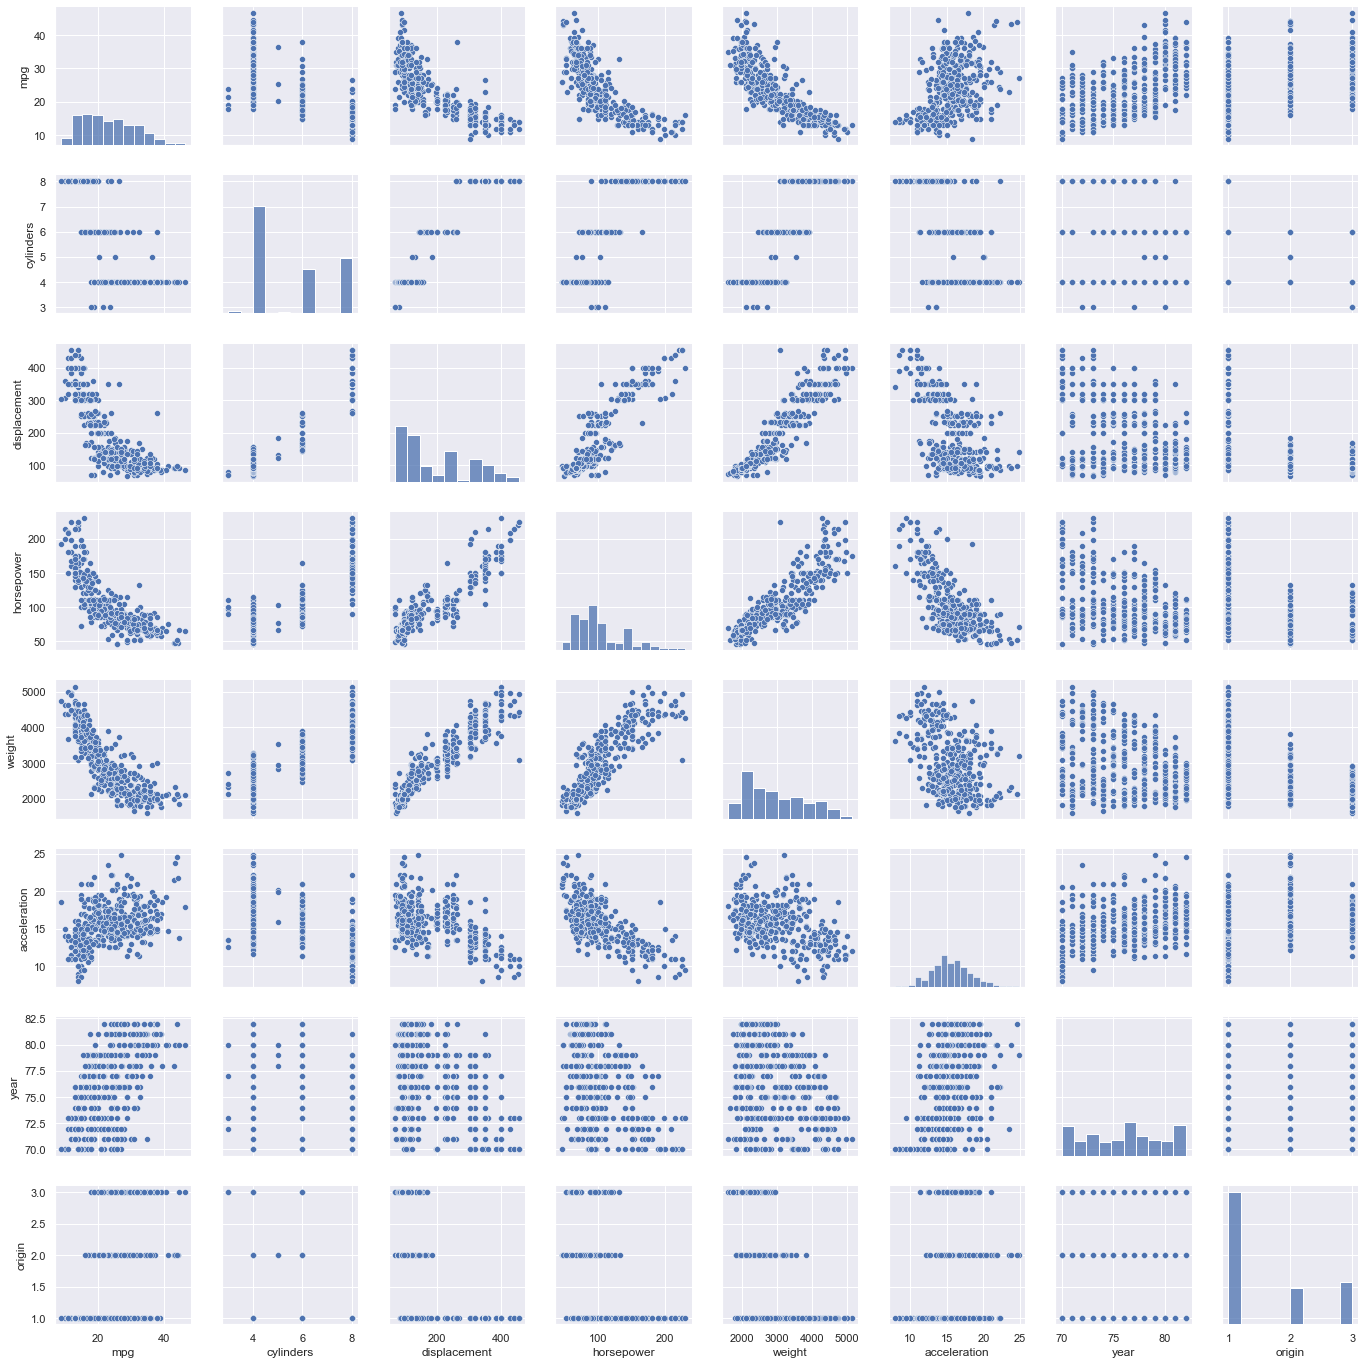

In [291]:
sns.pairplot(auto)

### (b) Matrix of correlations

Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [292]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


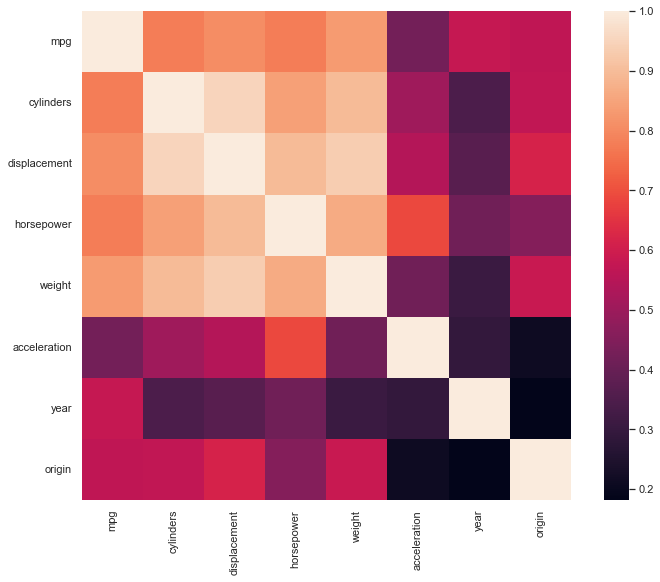

In [296]:
corr_matrix = auto.corr().abs()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.xticks(rotation=90)
plt.show()

### (c) Multivariate linear regression

Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

- Is there a relationship between the predictors and the response?

- Which predictors appear to have a statistically significant relationship to the response?

- What does the coefficient for the year variable suggest?

In [297]:
f = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)"

model = smf.ols(f, auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          1.79e-139
Time:                        15:32:08   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.839      0.000     -27.150      -8.759
C(origin)[T.2]     2.6300      0.566      4.643      0.000       1.516       3.744
C(origin)[T.3]     2.8532      0.553      5.162      0.000       1.766       3.940
cylinders         -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement       0.0240      0.008      3.133      0.002       0.009       0.039
horsepower        -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight            -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration       0.0791      0.098      0.805      0.421      -0.114       0.272
year               0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient for the `year` variable suggests that there is a positive relationship between `year` and `mpg` – the response variable increases as `year` increases. Specifically, this suggessts that cars manufactured more recently tend to be more fuel efficient and that all else being equal efficiency increases by 0.78 mpg/year.

In [298]:
model.pvalues[model.pvalues < 0.05].sort_values()

year              2.332943e-40
weight            6.375633e-22
C(origin)[T.3]    3.933208e-07
C(origin)[T.2]    4.720373e-06
Intercept         1.445124e-04
displacement      1.862685e-03
dtype: float64

In [299]:
model.params

Intercept        -17.954602
C(origin)[T.2]     2.630002
C(origin)[T.3]     2.853228
cylinders         -0.489709
displacement       0.023979
horsepower        -0.018183
weight            -0.006710
acceleration       0.079103
year               0.777027
dtype: float64

### (d) Outliers & High Leverage

Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument wil

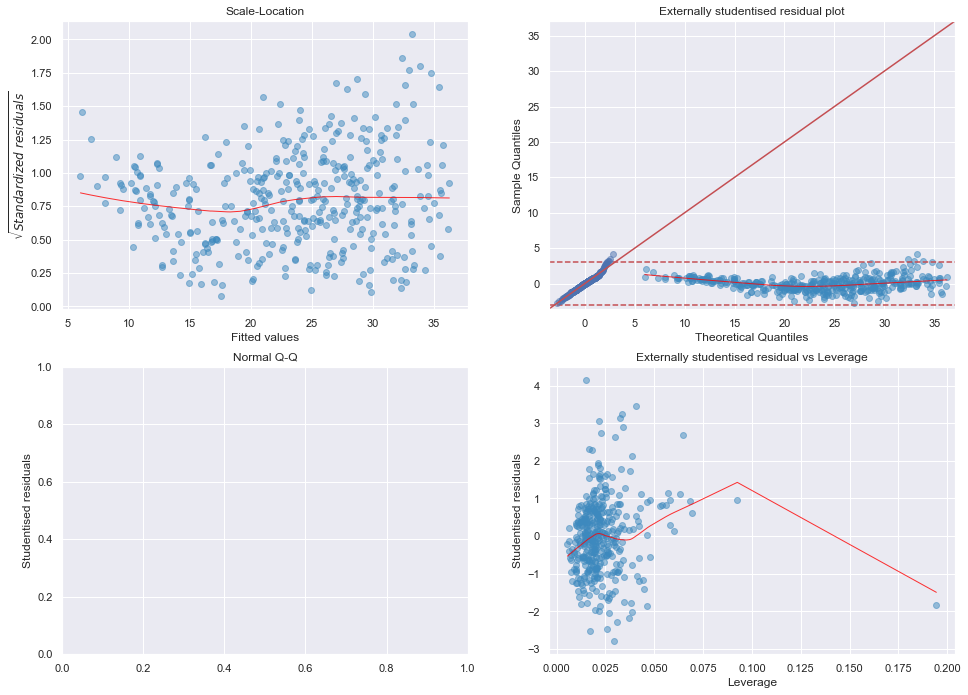

In [300]:
lm_plots(model)

**Linearity**: The u-shaped pattern in the top-left residual plot suggests that there a non-linear relationship that our model is unable to account for. The bottom left Scale-Location plot suggests that a square-root transform reduces the non-linearity of this relationship allowing our model to achieve an improved fit.

**Heteroscedasticity**: A conical pattern is apparent in the top-left plot suggesting that variance of residuals increases with response. The bottom left plot suggests that a square-root transform helps to mitigate this effect.

**Outliers**: The top-left plot suggests that there are five potential outliers towards the high end of our predicted responses. The bottom-right plot suggests that these outliers have low leverage, and so probably don't have a overly dispraportionate effect on our model.

**Leverage**: The bottom right plot reveals one point with particularly high leverage, although with a value around -1.2 this point isn't an outlier in terms of studentised residuals.

**Normality**: The top-right plot shows a normal distribution except for high value residuals. This suggests that the model under-estimates mpg for a larger number of observations than we might expect assuming a normal distribution.

### (e) The * and : symbols

Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [301]:
f = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin) \
    + cylinders*displacement \
    + cylinders*horsepower \
    + cylinders*weight \
    + cylinders*acceleration \
    + cylinders*year \
    + displacement*horsepower \
    + displacement*weight \
    + displacement*acceleration \
    + displacement*year \
    + horsepower*weight \
    + horsepower*acceleration \
    + horsepower*year \
    + weight*weight \
    + weight*acceleration \
    + weight*year \
    + acceleration*year \
    "
model = smf.ols(f, auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          1.66e-156
Time:                        15:32:17   Log-Likelihood:                -939.16
No. Observations:                 392   AIC:                             1926.
Df Residuals:                     368   BIC:                             2022.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [302]:
model.pvalues[model.pvalues < 0.05].sort_values()

cylinders:displacement       0.006867
C(origin)[T.2]               0.008352
C(origin)[T.3]               0.017020
displacement:year            0.019580
acceleration                 0.028365
displacement:weight          0.029446
acceleration:year            0.036595
displacement:acceleration    0.049588
dtype: float64

Notice the warning (2) that suggests the might be multicollinearity in this model. We can observe in the correlation plot above that there is strong collinearity between `mpg`, `cylinders`, `displacement`, `horespower`, and `weight`. This means further investigation is required to discern which, if any, of these features have a causal relationship with our response `mpg`.

### (f) Transformations of the variables

Try a few different transformations of the variables, such as $\log(X), \sqrt{X}, X^2$. Comment on your findings.

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument wil

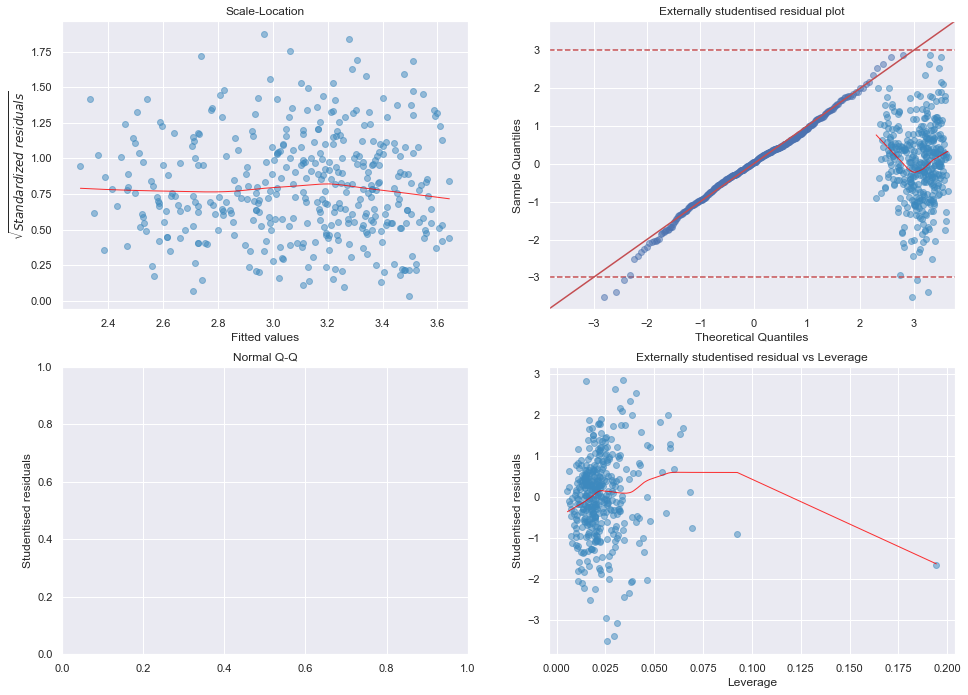

In [303]:
f = "np.log(mpg) ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)"

model = smf.ols(f, auto).fit()
lm_plots(model)

Comment: Taking the log of the response variable dramatically improves aspects of our diagnostic plots.

- there is less pattern in the left-hand residual plots suggesting the log transform of mpg as decreased the non-linearity of its relationship to features and so improved our models ability to fit the date.

- there is a reduction in the conic shape of the bottom left plot suggesting a reduction in homoscedasticity

- the top-right plot suggests the model is now inclined to overstimate instead of underestimate

- there are no-longer any outliers exceeding a studentised residual value of three. there are now two outliers <-3

### (g) Logs of all predictors

What if we take logs of all our predictors also?

In [304]:
f = "np.log1p(mpg) \
    ~ np.log1p(cylinders) \
    + np.log1p(displacement) \
    + np.log1p(horsepower) \
    + np.log1p(weight) \
    + np.log1p(acceleration) \
    + np.log1p(year) \
    + C(origin) \
    + np.log1p(cylinders*displacement) \
    + np.log1p(cylinders*horsepower) \
    + np.log1p(cylinders*weight) \
    + np.log1p(cylinders*acceleration) \
    + np.log1p(cylinders*year) \
    + np.log1p(displacement*horsepower) \
    + np.log1p(displacement*weight) \
    + np.log1p(displacement*acceleration) \
    + np.log1p(displacement*year) \
    + np.log1p(horsepower*weight) \
    + np.log1p(horsepower*acceleration) \
    + np.log1p(horsepower*year) \
    + np.log1p(weight*weight) \
    + np.log1p(weight*acceleration) \
    + np.log1p(weight*year) \
    + np.log1p(acceleration*year) \
    "

model = smf.ols(f, auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log1p(mpg)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          9.11e-181
Time:                        15:32:22   Log-Likelihood:                 370.15
No. Observations:                 392   AIC:                            -690.3
Df Residuals:                     367   BIC:                            -591.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [305]:
model.pvalues[model.pvalues < 0.05].sort_values()

np.log1p(cylinders * displacement)     5.450938e-07
np.log1p(year)                         3.554276e-06
Intercept                              4.103286e-06
np.log1p(horsepower * acceleration)    4.088496e-04
np.log1p(cylinders * acceleration)     5.328883e-03
np.log1p(horsepower * weight)          1.089279e-02
np.log1p(horsepower * year)            2.345207e-02
np.log1p(displacement)                 3.208041e-02
np.log1p(cylinders * horsepower)       4.141974e-02
dtype: float64

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument wil

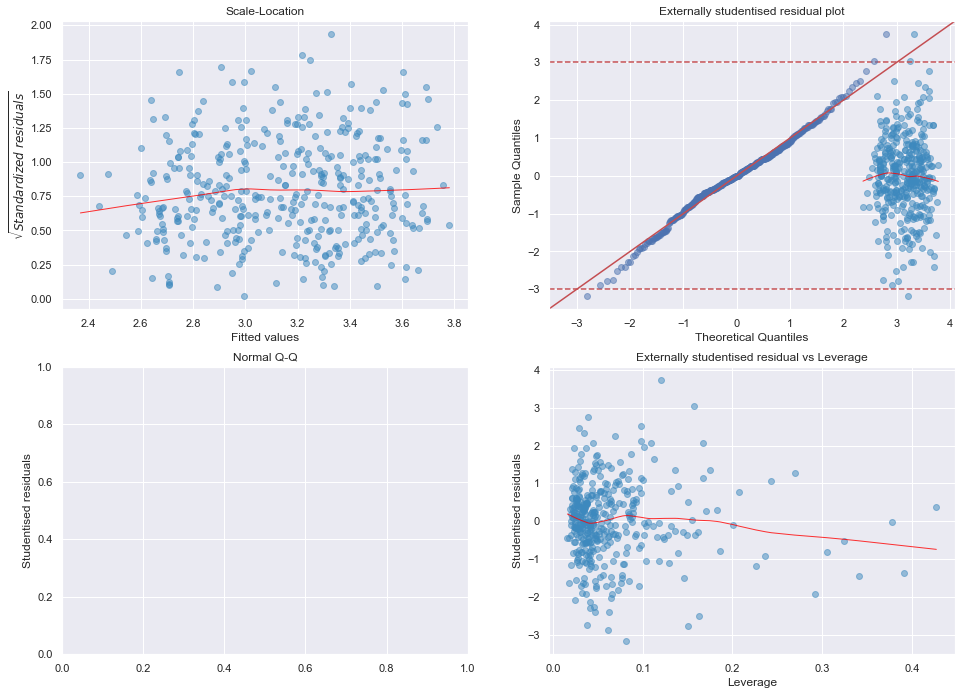

In [306]:
lm_plots(model)

### (h) Only use the features with p-values < 0.05

What if we only use the features from this model with p-values < 0.05?

In [307]:
import re

pat = re.compile("\[.+\]")

significant_features = model.pvalues[model.pvalues < 0.05].drop("Intercept").index
significant_features = [
    re.sub(pattern=pat, repl="", string=i) for i in significant_features
]
list(set(significant_features))

['np.log1p(cylinders * displacement)',
 'np.log1p(year)',
 'np.log1p(horsepower * weight)',
 'np.log1p(horsepower * year)',
 'np.log1p(displacement)',
 'np.log1p(horsepower * acceleration)',
 'np.log1p(cylinders * horsepower)',
 'np.log1p(cylinders * acceleration)']

In [308]:
f = "np.log(mpg) ~ " + " + ".join(significant_features)

model_new = smf.ols(f, auto).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     394.3
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          1.11e-179
Time:                        15:32:40   Log-Likelihood:                 302.85
No. Observations:                 392   AIC:                            -587.7
Df Residuals:                     383   BIC:                            -552.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument wil

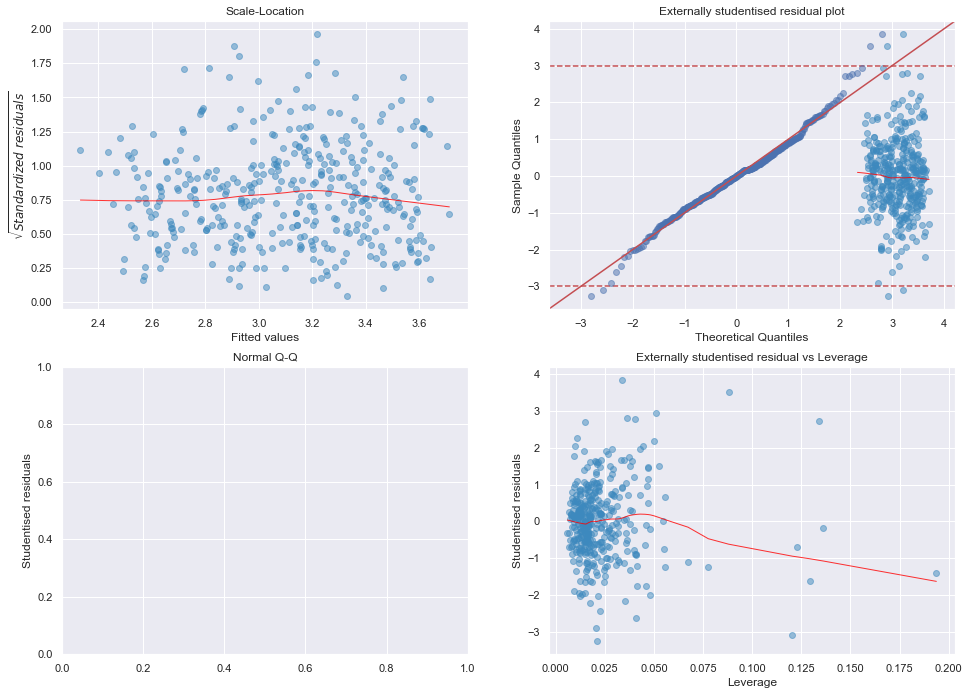

In [309]:
lm_plots(model_new)

## 12. This problem involves simple linear regression without an intercept.

#### (a) The coefficient estimate $\hat{\beta}$

Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

$\hat{\beta}=1$

## 14. This problem focuses on the collinearity problem.

### (a) Perform the following commands in R:

```
set.seed(1)
x1=runif(100)
x2=0.5*x1+rnorm(100)/10
y=2+2*x1+0.3*x2+rnorm(100)
```

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

Form of the linear model is:

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$

Where the coefficients are:

$\beta_0 = 2$  
$\beta_1 = 2$  
$\beta_2 = 0.3$  

In [310]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.randn(100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.randn(100)

df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

### (b) Correlation between $x_1$ and $x_2$

What is the correlation between $x_1$ and $x_2$? Create a scatterplot displaying the relationship between the variables.

Correlation coefficient: 0.8390596222844917


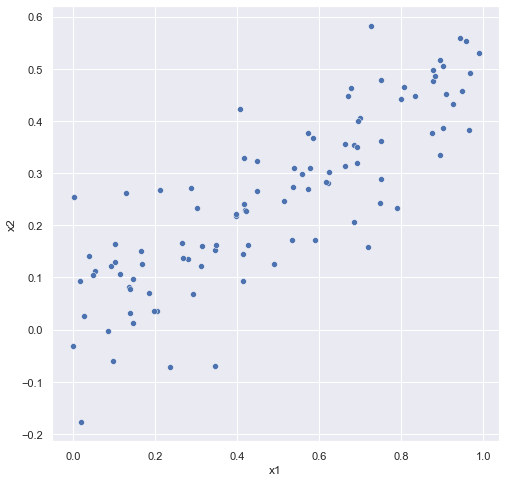

In [311]:
sns.scatterplot(x="x1", y="x2", data=df)

print("Correlation coefficient: " + str(np.corrcoef(x1, x2)[0][1]))

There is correlation between $x_1$ and $x_2$ with coefficient 0.839. The plot suggests a linear relationship with a gradient of around 0.5 and high variance.

### (c) Regression using $x_1$ and $x_2$

Using this data, fit a least squares regression to predict y using $x_1$ and $x_2$. Describe the results obtained. What are $\beta_0$, $\beta_1$, and $\beta_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

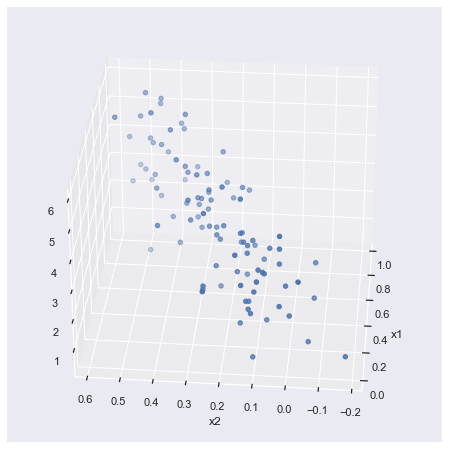

In [312]:
plt.subplots(figsize=(8, 8))
ax = plt.subplot(111, projection="3d")
ax.scatter(df["x1"], df["x2"], df["y"])
ax.view_init(30, 185)
ax.set(xlabel="x1")
ax.set(ylabel="x2")
plt.show()

In [313]:
f = "y ~ x1 + x2"
model = smf.ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           4.40e-07
Time:                        15:32:44   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.0

$\beta_0 = 2$  
$\beta_1 = 2$  
$\beta_2 = 0.3$ 

$\hat{\beta_0} = 2.1893$  
$\hat{\beta_1} = 0.7046$  
$\hat{\beta_2} = 2.5024$ 

- The intercept $\hat{\beta_0}$ is estimated fairly accurately.

- $\hat{\beta_1}$ and $\hat{\beta_2}$ are not well estimated. It's almost as though our model has got these the wrong way around.

- we cannot reject the null hypothesis for $\hat{\beta_1}$

- we can reject the null hypothesis for $\hat{\beta_2}$

### (d) Regression using $x_1$

Now fit a least squares regression to predict $y$ using only $x_1$. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [314]:
f = "y ~ x1"
model = smf.ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           6.68e-07
Time:                        15:32:45   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

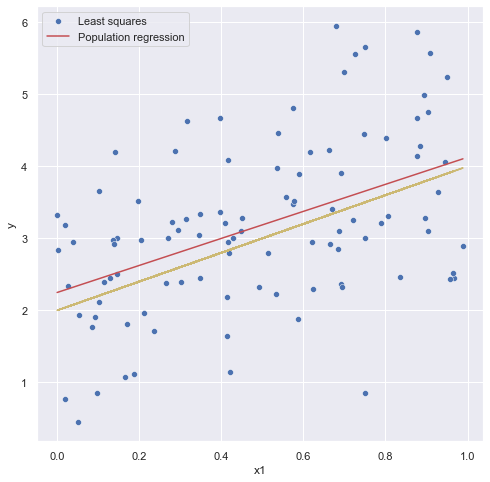

In [315]:
ax = sns.scatterplot(x="x1", y="y", data=df)

ax.set(xlabel="x1")
ax.set(ylabel="y")
ax.plot(df["x1"].sort_values(), model.predict(df["x1"].sort_values()), color="r")
ax.plot(x1, 2 + (2 * x1), color="y")
ax.legend(["Least squares", "Population regression"])

### (e) Regression using $x_2$

Now fit a least squares regression to predict $y$ using only $x_2$. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [316]:
f = "y ~ x2"
model = smf.ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           1.09e-07
Time:                        15:32:45   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

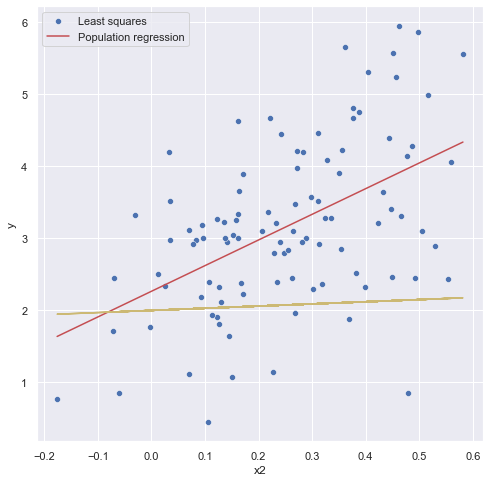

In [317]:
ax = sns.scatterplot(x="x2", y="y", data=df)
ax.set(xlabel="x2")
ax.set(ylabel="y")
ax.plot(df["x2"].sort_values(), model.predict(df["x2"].sort_values()), color="r")
ax.plot(x2, 2 + (0.3 * x2), color="y")
ax.legend(["Least squares", "Population regression"])

### (f) Contradict ?

Do the results obtained in (c)~(e) contradict each other? Explain your answer.

$β_1$

- result c) suggests probability < 0.271 that the null hypothesis $H_0 :β_1 =0$ is true

- result d) suggests probability < 0.000 that the null hypothesis $H_0 :β_1 =0$ is true

$β_2$

- result c) suggests probability < 0.031 that the null hypothesis $H_0 :β_2 =0$ is true
    
- result e) suggests probability < 0.000 that the null hypothesis $H_0 :β_2 =0$ is true

Yes. We get contradictory results for the p-value associated with $\beta_1$, which in results c woul cause us to accept the null hypothesis and in d) we would reject it.

This contradiction can be explained by the collinearity of $x_1$ and $x_2$ which causes an increased standard error for all $\beta_j$ when our model incorporates both features, which in turn increases the p-values and causes us to incorrectly accept the null hypothesis $H_0 :\beta_1 =0$ when our model uses both features.

### (g) A mismeasured observation

Now suppose we obtain one additional observation, which was unfortunately mismeasured.

```
x1=c(x1, 0.1) 
x2=c(x2, 0.8)
y=c(y,6)
```
Re-fit the linear models from (c) ~ (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [318]:
df2 = df.append({"x1": 0.1, "x2": 0.8, "y": 6}, ignore_index=True)

model_c = smf.ols(formula="y ~ x1 + x2", data=df2).fit()
model_d = smf.ols(formula="y ~ x1", data=df2).fit()
model_e = smf.ols(formula="y ~ x2", data=df2).fit()

- The addition of this anomaly has increased model c's p-value for $\hat{\beta_1}$, suggesting even more strongly the false acceptance of the null hpyothesis.

- When considered seperately the estimates for $\hat{\beta_1}$ and $\hat{\beta_2}$ are worsened by introducing this anomaly.

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument wil

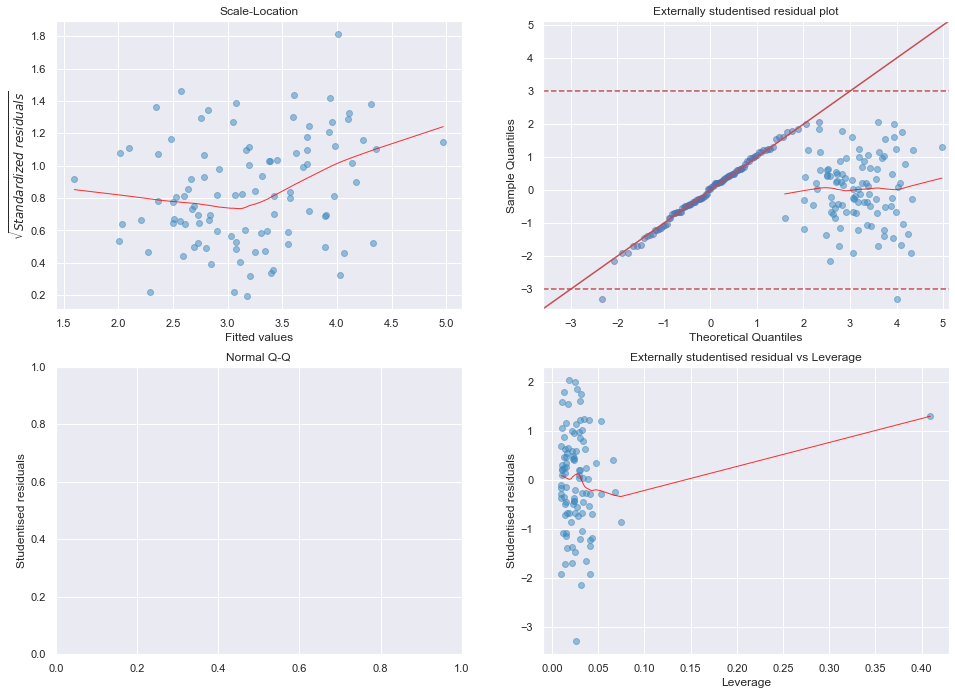

In [319]:
lm_plots(model_c)

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument wil

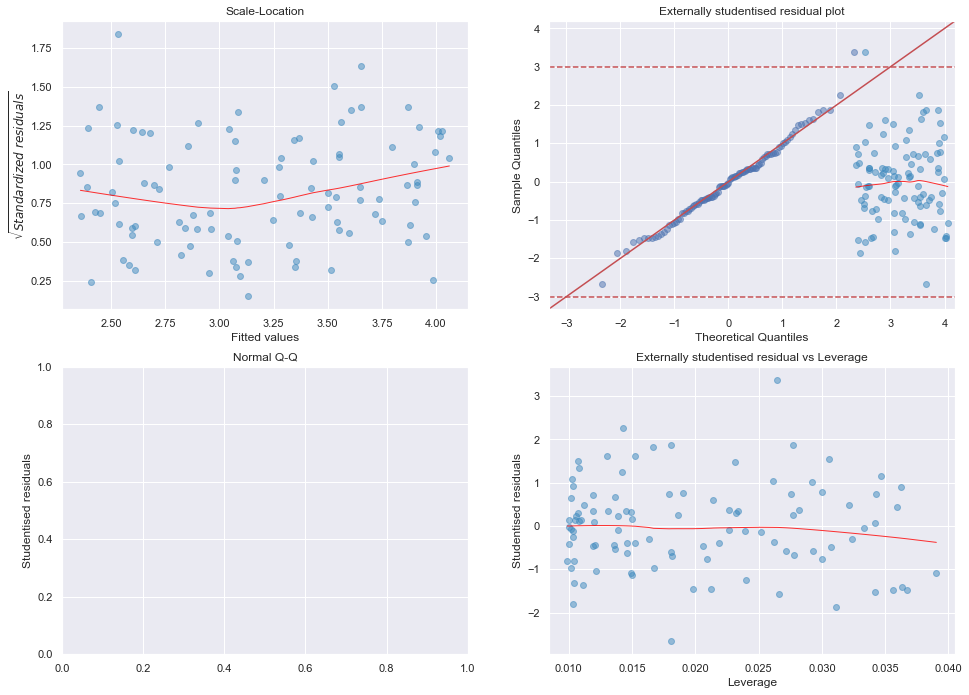

In [320]:
lm_plots(model_d)

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument wil

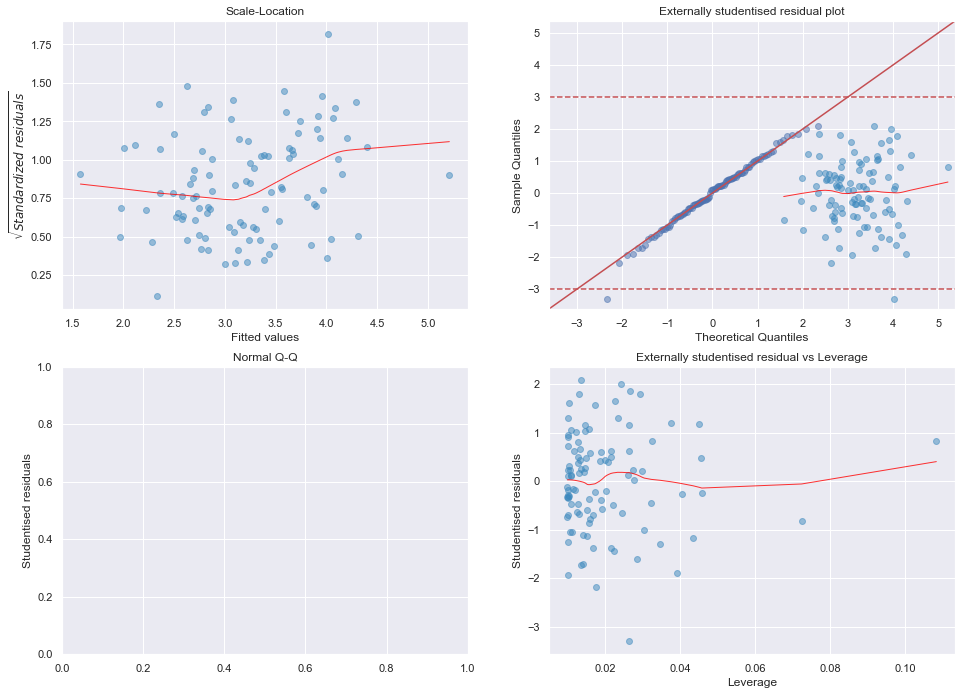

In [321]:
lm_plots(model_e)

- model_c : the anomaly is not an outlier and very high leverage

- model_d : the anomaly is an outlier but not high leverage

- model_e : the anomaly is not an outlier but fairly high leverage

## 15. Boston data set

### (a) Simple linear regression

For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [322]:
from sklearn.datasets import load_boston

In [323]:
boston = load_boston()
boston = pd.DataFrame(boston.data, columns=boston.feature_names)

assert boston.isnull().sum().sum() == 0

models_a = [
    smf.ols(formula="CRIM ~ {}".format(f), data=boston).fit()
    for f in boston.columns[1:]
]

for model in models_a:
    dp = 4
    display(
        pd.DataFrame(
            {
                "coef": np.around(model.params, dp),
                "std_err": np.around(model.bse, dp),
                "t": np.around(model.params / model.bse, dp),
                "P>|t|": np.around(model.pvalues, dp),
                "[0.025": np.around(model.conf_int(alpha=0.05)[0], dp),
                "0.975]": np.around(model.conf_int(alpha=0.05)[1], dp),
            }
        )
    )

/Users/sagawithme/miniconda3/envs/p39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,4.4537,0.4172,10.6747,0.0,3.6340,5.2734
ZN,-0.0739,0.0161,-4.5938,0.0,-0.1056,-0.0423


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-2.0637,0.6672,-3.0930,0.0021,-3.3746,-0.7529
INDUS,0.5098,0.0510,9.9908,0.0000,0.4095,0.6100


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,3.7444,0.3961,9.4530,0.0000,2.9662,4.5227
CHAS,-1.8928,1.5061,-1.2567,0.2094,-4.8518,1.0663


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-13.7199,1.6995,-8.073,0.0,-17.0588,-10.3809
NOX,31.2485,2.9992,10.419,0.0,25.3561,37.1410


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,20.4818,3.3645,6.0877,0.0,13.8717,27.0919
RM,-2.6841,0.5320,-5.0448,0.0,-3.7293,-1.6388


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-3.7779,0.9440,-4.0021,0.0001,-5.6325,-1.9233
AGE,0.1078,0.0127,8.4628,0.0000,0.0828,0.1328


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,9.4993,0.7304,13.0056,0.0,8.0643,10.9343
DIS,-1.5509,0.1683,-9.2135,0.0,-1.8816,-1.2202


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-2.2872,0.4435,-5.1573,0.0,-3.1584,-1.4159
RAD,0.6179,0.0343,17.9982,0.0,0.5505,0.6854


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-8.5284,0.8158,-10.4539,0.0,-10.1312,-6.9256
TAX,0.0297,0.0018,16.0994,0.0,0.0261,0.0334


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-17.6469,3.1473,-5.6071,0.0,-23.8303,-11.4635
PTRATIO,1.1520,0.1694,6.8014,0.0,0.8192,1.4847


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,16.5535,1.4259,11.6092,0.0,13.7521,19.3550
B,-0.0363,0.0039,-9.3670,0.0,-0.0439,-0.0287


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-3.3305,0.6938,-4.8007,0.0,-4.6936,-1.9675
LSTAT,0.5488,0.0478,11.4907,0.0,0.4550,0.6426


In [324]:
from IPython.display import HTML, display

display(HTML("<h4>p < 0.05</h4>"))
for model in models_a:
    if model.pvalues[1] < 0.05:
        print(model.params[1:].index[0])

display(HTML("<h4>p > 0.05</h4>"))
for model in models_a:
    if model.pvalues[1] > 0.05:
        print(model.params[1:].index[0])

ZN
INDUS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


CHAS


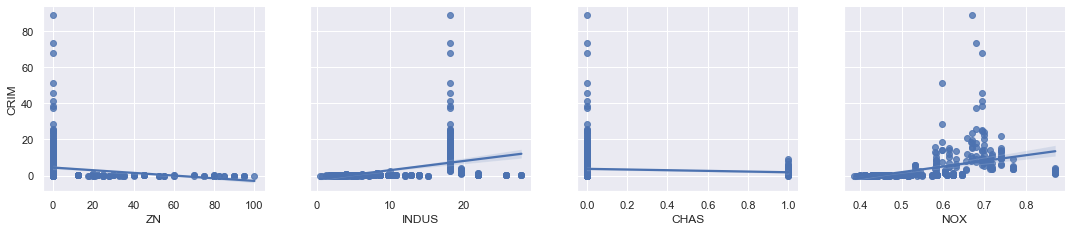

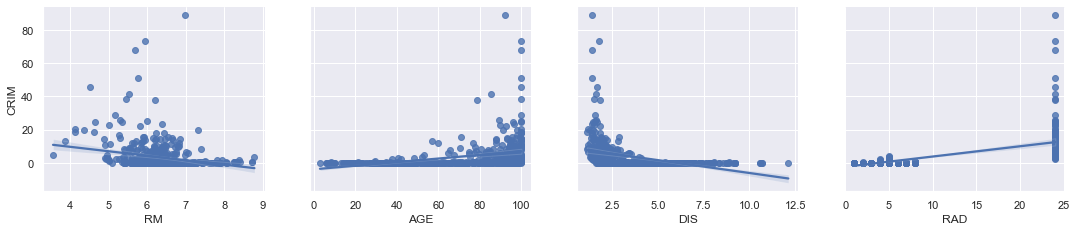

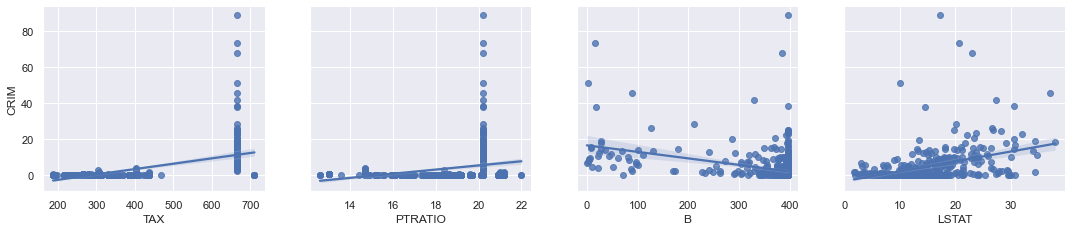

In [325]:
def plot_grid(df, response, cols):
    variables = df.columns.drop(response)
    for i in range(0, len(variables), cols):
        g = sns.PairGrid(
            df, y_vars=[response], x_vars=variables[i : i + cols], height=4
        )
        g.map(sns.regplot)
    return


plot_grid(boston, "CRIM", 4)

### (b) Multivariate regression

Fit a multivariate regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [326]:
response = "CRIM"
predictors = boston.columns.drop(response)
f = "{} ~ {}".format(response, "+".join(predictors))

model_b = smf.ols(formula=f, data=boston).fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           4.84e-55
Time:                        15:32:50   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9967      6.979      1.432      0.153      -3.716      23.709
ZN             0.0364      0.019      1.943      0.053      -0.000       0.073
INDUS         -0.0694      0.084     -0.825      0.410      -0.235       0.096
CHAS          -1.3117      1.179     -1.112      0.267      -3.629       1.005
NOX           -6.9288      5.225     -1.326      0.185     -17.195       3.338
RM            -0.3348      0.573     -0.585      0.559      -1.460       0.790
AGE            0.0013      0.018      0.074      0.941      -0.034       0.037
DIS           -0.7089      0.271     -2.612      0.009      -1.242      -0.176
RAD            0.5389      0.088      6.151      0.000       0.367       0.711
TAX           -0.0014      0.005     -0.263      0.793      -0.011       0.009
PTRATIO       -0.0834      0.179     -0.465      0.642      -0.436       0.269
B             -0.0096      0.004     -2.625      0.009      -0.017      -0.002
LSTAT          0.2356      0.069      3.431      0.001       0.101       0.371
==============================================================================
Omnibus:                      685.174   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97204.794
Skew:                           6.921   Prob(JB):                         0.00
Kurtosis:                      69.475   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [327]:
display(HTML("<h4>p < 0.05</h4>"))

model_b.pvalues[model_b.pvalues < 0.05]

DIS      9.287402e-03
RAD      1.597550e-09
B        8.931725e-03
LSTAT    6.524119e-04
dtype: float64

### (c) Comparison

How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Multivariate regression found 4 of 12 predictors to be significnat where univariate regression found 11 of 12 significant. Multivariate regression seems to find significanlty less predictors to be significant.

,Univariate_coef,Multivariate_coef
ZN,-0.073935,0.036405
INDUS,0.509776,-0.069435
CHAS,-1.892777,-1.311667
NOX,31.248531,-6.928836
RM,-2.684051,-0.334794
AGE,0.107786,0.001343
DIS,-1.550902,-0.708934
RAD,0.617911,0.538916
TAX,0.029742,-0.001356
PTRATIO,1.151983,-0.083383


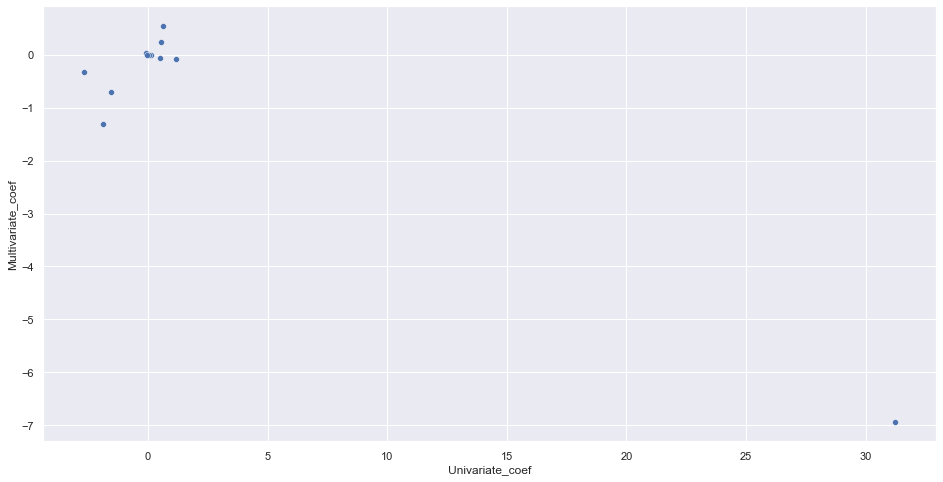

In [328]:
univariate_params = pd.concat([m.params[1:] for m in models_a])
multivariate_params = model_b.params[1:]

df = pd.DataFrame(
    {
        "Univariate_coef": univariate_params,
        "Multivariate_coef": multivariate_params,
    }
)
display(df)

plt.subplots(figsize=(16, 8))
ax = sns.scatterplot(x="Univariate_coef", y="Multivariate_coef", data=df)

### (d) Non-linear association

Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

In [329]:
models_d = [
    smf.ols(
        formula="CRIM ~ {0} + np.power({0}, 2) + np.power({0}, 3)".format(f),
        data=boston,
    ).fit()
    for f in boston.columns[1:]
]

for model in models_d:
    dp = 4
    display(
        pd.DataFrame(
            {
                "coef": np.around(model.params, dp),
                "std_err": np.around(model.bse, dp),
                "t": np.around(model.params / model.bse, dp),
                "P>|t|": np.around(model.pvalues, dp),
                "[0.025": np.around(model.conf_int(alpha=0.05)[0], dp),
                "0.975]": np.around(model.conf_int(alpha=0.05)[1], dp),
            }
        )
    )

,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,4.8461,0.4330,11.1922,0.0000,3.9954,5.6967
ZN,-0.3322,0.1098,-3.0252,0.0026,-0.5479,-0.1164
"np.power(ZN, 2)",0.0065,0.0039,1.6791,0.0938,-0.0011,0.0141
"np.power(ZN, 3)",-0.0000,0.0000,-1.2030,0.2295,-0.0001,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,3.6626,1.5740,2.3269,0.0204,0.5702,6.7550
INDUS,-1.9652,0.4820,-4.0773,0.0001,-2.9122,-1.0182
"np.power(INDUS, 2)",0.2519,0.0393,6.4070,0.0000,0.1747,0.3292
"np.power(INDUS, 3)",-0.0070,0.0010,-7.2920,0.0000,-0.0089,-0.0051


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,3.744400e+00,3.965000e-01,9.4436,0.0000,2.965400e+00,4.523500e+00
CHAS,-4.770120e+13,1.153568e+14,-0.4135,0.6794,-2.743416e+14,1.789392e+14
"np.power(CHAS, 2)",2.385060e+13,5.767838e+13,0.4135,0.6794,-8.946961e+13,1.371708e+14
"np.power(CHAS, 3)",2.385060e+13,5.767838e+13,0.4135,0.6794,-8.946961e+13,1.371708e+14


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,233.0866,33.6431,6.9282,0.0,166.9880,299.1852
NOX,-1279.3713,170.3975,-7.5082,0.0,-1614.1513,-944.5912
"np.power(NOX, 2)",2248.5441,279.8993,8.0334,0.0,1698.6257,2798.4624
"np.power(NOX, 3)",-1245.7029,149.2816,-8.3446,0.0,-1538.9966,-952.4091


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,112.6246,64.5172,1.7457,0.0815,-14.1325,239.3817
RM,-39.1501,31.3115,-1.2503,0.2118,-100.6679,22.3676
"np.power(RM, 2)",4.5509,5.0099,0.9084,0.3641,-5.2920,14.3938
"np.power(RM, 3)",-0.1745,0.2637,-0.6615,0.5086,-0.6927,0.3437


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-2.5488,2.7691,-0.9204,0.3578,-7.9893,2.8918
AGE,0.2737,0.1864,1.4683,0.1427,-0.0925,0.6398
"np.power(AGE, 2)",-0.0072,0.0036,-1.9878,0.0474,-0.0144,-0.0001
"np.power(AGE, 3)",0.0001,0.0000,2.7237,0.0067,0.0000,0.0001


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,30.0476,2.4459,12.2850,0.0,25.2422,34.8530
DIS,-15.5544,1.7360,-8.9600,0.0,-18.9650,-12.1437
"np.power(DIS, 2)",2.4521,0.3464,7.0783,0.0,1.7715,3.1327
"np.power(DIS, 3)",-0.1186,0.0204,-5.8135,0.0,-0.1587,-0.0785


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-0.6055,2.0501,-0.2954,0.7678,-4.6334,3.4223
RAD,0.5127,1.0436,0.4913,0.6234,-1.5376,2.5631
"np.power(RAD, 2)",-0.0752,0.1485,-0.5061,0.6130,-0.3670,0.2167
"np.power(RAD, 3)",0.0032,0.0046,0.7031,0.4823,-0.0058,0.0122


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,19.1836,11.7955,1.6263,0.1045,-3.9911,42.3583
TAX,-0.1533,0.0957,-1.6023,0.1097,-0.3413,0.0347
"np.power(TAX, 2)",0.0004,0.0002,1.4877,0.1375,-0.0001,0.0008
"np.power(TAX, 3)",-0.0000,0.0000,-1.1668,0.2439,-0.0000,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,477.1840,156.7950,3.0434,0.0025,169.1288,785.2393
PTRATIO,-82.3605,27.6439,-2.9793,0.0030,-136.6726,-28.0485
"np.power(PTRATIO, 2)",4.6353,1.6083,2.8821,0.0041,1.4755,7.7952
"np.power(PTRATIO, 3)",-0.0848,0.0309,-2.7433,0.0063,-0.1455,-0.0241


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,18.2637,2.3049,7.9238,0.0000,13.7353,22.7921
B,-0.0836,0.0563,-1.4834,0.1386,-0.1942,0.0271
"np.power(B, 2)",0.0002,0.0003,0.7162,0.4742,-0.0004,0.0008
"np.power(B, 3)",-0.0000,0.0000,-0.6078,0.5436,-0.0000,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,1.2010,2.0286,0.5920,0.5541,-2.7847,5.1866
LSTAT,-0.4491,0.4649,-0.9660,0.3345,-1.3624,0.4643
"np.power(LSTAT, 2)",0.0558,0.0301,1.8522,0.0646,-0.0034,0.1149
"np.power(LSTAT, 3)",-0.0009,0.0006,-1.5170,0.1299,-0.0020,0.0003


In [330]:
# In which of the models is there a statistically significant association between the predictor and the response?

display(HTML("<h4>Features with p < 0.05</h4>"))

sig = pd.concat([model.pvalues[model.pvalues < 0.05] for model in models_d])

display(pd.DataFrame({"P>|t|": sig.drop("Intercept")}))

,P>|t|
ZN,2.612296e-03
INDUS,5.297064e-05
"np.power(INDUS, 2)",3.420187e-10
"np.power(INDUS, 3)",1.196405e-12
NOX,2.758372e-13
"np.power(NOX, 2)",6.811300e-15
"np.power(NOX, 3)",6.961110e-16
"np.power(AGE, 2)",4.737733e-02
"np.power(AGE, 3)",6.679915e-03
DIS,6.374792e-18


- There is evidence of a non-linear association between the repsonse and INDUS, NOX, AGE, DIS, PTRATIO

- There is evidence of a linear association between the response and ZN